In [70]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from nla.plot import *
from nla.util import complex_grid

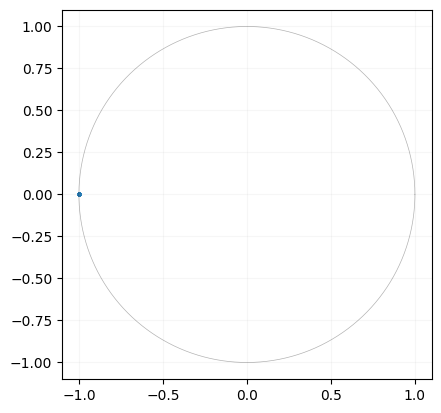

In [78]:
N = 32
A = np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-2), 2) - np.eye(32)

plot_eigenvalues(A)

In [85]:
# We'll use exercise 26.1 condition (iii) to determine the minimum norm of a perturbation
# required to get an eigenvalue of A + δA at z
# Note that we could also use exercise 26.3(b) to compute radii of circles instead of
# computing this on a grid.
zz = complex_grid((-2,1), (-1, 1), 300, 200)

# get the minimum singular value of all matrices (zI - A) for
# the z in our grid
mm = zz[:, :, None, None] * np.eye(N)[None, None, :, :] - A
ss = np.linalg.svdvals(mm)
sm = np.min(ss, axis=2)

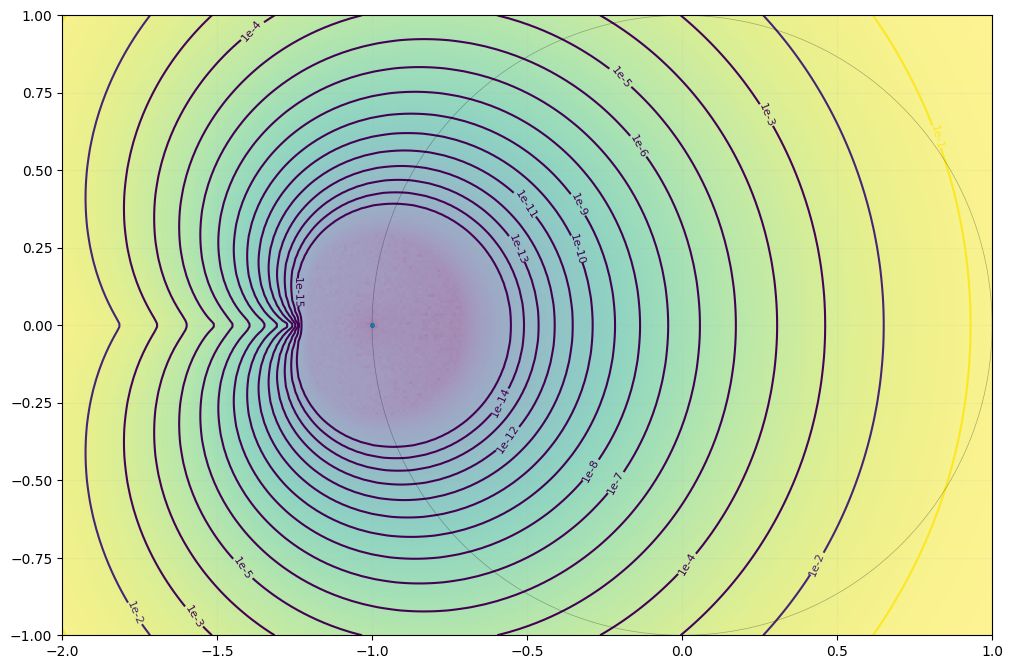

In [97]:
plt.figure(figsize=(12,12))

plt.imshow(np.log(sm),
           extent=[np.real(zz[0, 0]), np.real(zz[0, -1]), np.imag(zz[0, 0]), np.imag(zz[-1, 0]),],
           alpha=0.5)

levels = [10.**(-x) for x in np.r_[1:16]][::-1]
contours = plt.contour(np.real(zz), np.imag(zz), sm, levels=levels)
plt.clabel(contours, inline=True, fontsize=8, fmt=lambda x: f"1e{int(np.round(np.log10(x)))}")

plot_eigenvalues(A)

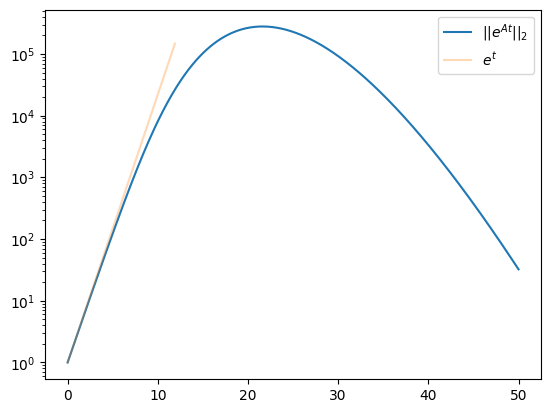

In [116]:
t = np.linspace(0, 50, 501)

mm_norms = np.linalg.norm(scipy.linalg.expm(t[:, None, None]*A), axis=(1,2), ord=2)

plt.plot(t, mm_norms, label="$||e^{At}||_2$")
plt.yscale('log')
plt.plot(t[:120], np.exp(t)[:120], alpha=0.3, label="$e^t$")

plt.legend()

In [105]:
np.log(mm_norms[50])/t[50]

np.float64(0.9623240890972294)

In [106]:
t[50]

np.float64(5.0)

In [107]:
np.exp(5)

np.float64(148.4131591025766)

In [108]:
mm_norms[50]

np.float64(122.93065863696629)